In [1]:
# Chapter 4 Lab: Logistic Regression, LDA, QDA, and KNN

# The Stock Market Data

library(ISLR)

In [2]:
names(Smarket)
dim(Smarket)
summary(Smarket)


[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

[1] 1250    9

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [4]:
head(Smarket)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


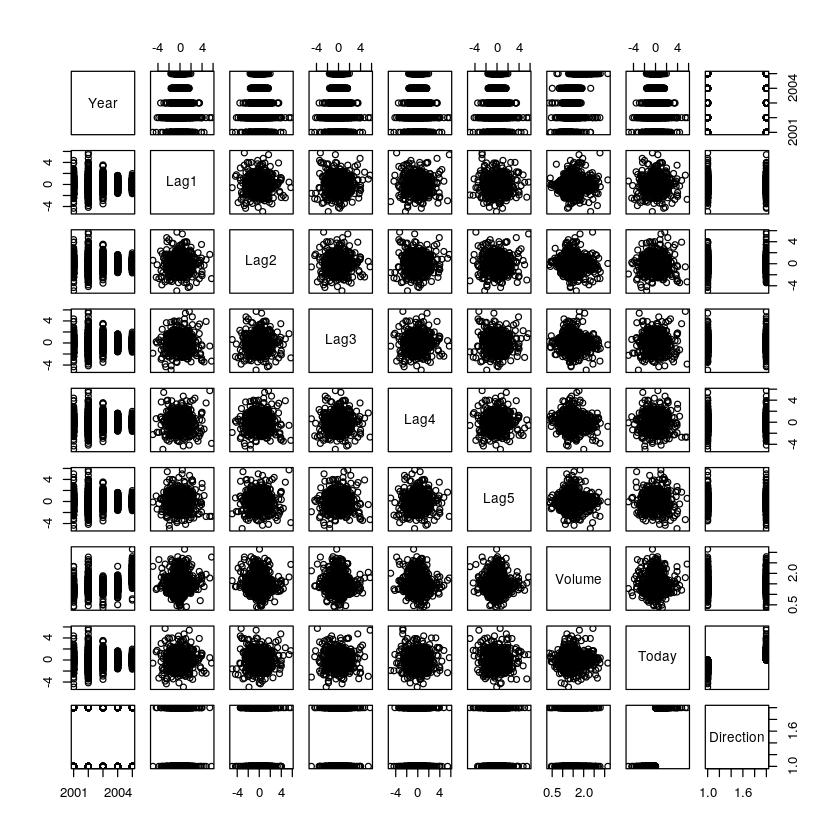

In [5]:
pairs(Smarket)


In [5]:
#cor(Smarket)
cor(Smarket[,-9]) # the direction feature is qualititative 


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


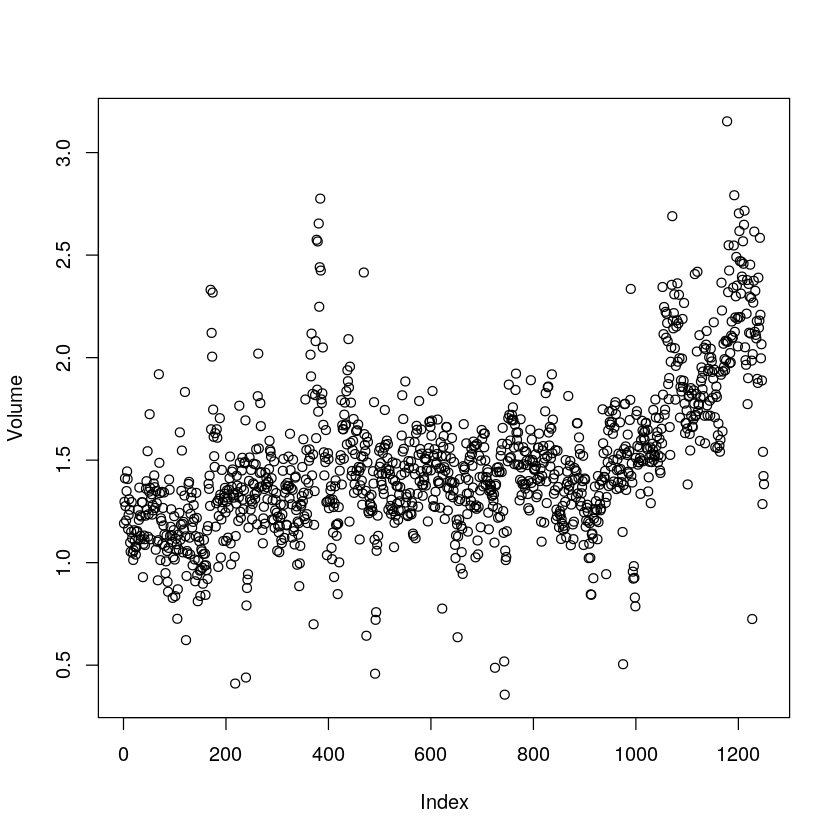

In [6]:
attach(Smarket)
plot(Volume) #number of shares traded on the previous day in billion

In [12]:
# Logistic Regression

glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial)

summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [13]:
coef(glm.fit)
summary(glm.fit)$coef
summary(glm.fit)$coef[,4]


(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

In [14]:
glm.probs=predict(glm.fit,type="response")
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [15]:
contrasts(Direction)

,Up
Down,0
Up,1


In [16]:
glm.pred=rep("Down",1250) # rep creats an array
glm.pred[glm.probs>.5]="Up"

In [18]:
table(glm.pred,Direction)
(507+145)/1250
mean(glm.pred==Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

[1] 0.5216

[1] 0.5216

In [19]:
train=(Year<2005)
Smarket.2005=Smarket[!train,]
dim(Smarket.2005)
Direction.2005=Direction[!train]


[1] 252   9

In [20]:
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fit,Smarket.2005,type="response")


In [22]:
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)
mean(glm.pred!=Direction.2005)


        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] 0.4801587

[1] 0.5198413

In [23]:
glm.fit=glm(Direction~Lag1+Lag2,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fit,Smarket.2005,type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)
106/(106+76)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

[1] 0.5824176

In [24]:
predict(glm.fit,newdata=data.frame(Lag1=c(1.2,1.5),Lag2=c(1.1,-0.8)),type="response")


1         2 
0.4791462 0.4960939

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

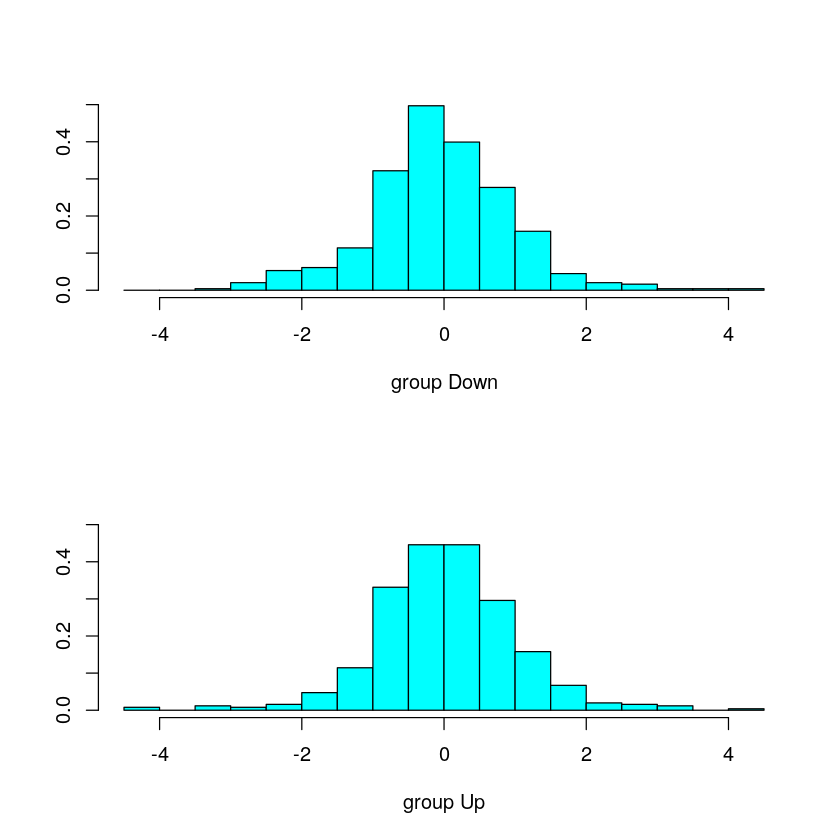

In [25]:
# Linear Discriminant Analysis

library(MASS)
lda.fit=lda(Direction~Lag1+Lag2,data=Smarket,subset=train)
lda.fit
plot(lda.fit)


In [26]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)


[1] "class"     "posterior" "x"

In [27]:
lda.class=lda.pred$class
table(lda.class,Direction.2005)
mean(lda.class==Direction.2005)


         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

In [28]:
sum(lda.pred$posterior[,1]>=.5)
sum(lda.pred$posterior[,1]<.5)


[1] 70

[1] 182

In [29]:
lda.pred$posterior[1:20,1]
lda.class[1:20]
sum(lda.pred$posterior[,1]>.9)

999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331

[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up

[1] 0

In [30]:
# Quadratic Discriminant Analysis

qda.fit=qda(Direction~Lag1+Lag2,data=Smarket,subset=train)
qda.fit


Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [31]:
qda.class=predict(qda.fit,Smarket.2005)$class
table(qda.class,Direction.2005)
mean(qda.class==Direction.2005)

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

[1] 0.5992063

In [32]:
# K-Nearest Neighbors

library(class)
train.X=cbind(Lag1,Lag2)[train,]
test.X=cbind(Lag1,Lag2)[!train,]
train.Direction=Direction[train]



In [33]:
set.seed(1)
knn.pred=knn(train.X,test.X,train.Direction,k=1)
table(knn.pred,Direction.2005)
(83+43)/252


        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

In [34]:
knn.pred=knn(train.X,test.X,train.Direction,k=3)
table(knn.pred,Direction.2005)
mean(knn.pred==Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

[1] 0.5357143